# Практическое задание 2  
## $P(\theta)$-модель, τ(theta)=theta, n = 1500

### 1. Плотность распределения  

$$
f(x\mid\theta)=\frac{\theta^{x}\,e^{-\theta}}{x!},\qquad x=0,1,2,\dots
$$


### 2. Экспоненциальное представление  

$$
f(x,\theta)=\exp\{A(\theta)B(x)+C(\theta)+D(x)\},
$$

$$
A(\theta)=\ln\theta,\qquad B(x)=x,\qquad
C(\theta)=-\theta,\qquad D(x)=-\ln(x!).
$$


### 3. Произведения и производные  

$$
A'(\theta)=\frac1\theta,\qquad A''(\theta)=-\frac1{\theta^{2}},\qquad
C'(\theta)=-1,\qquad C''(\theta)=0.
$$


### 4. Функция информации (формула из задания)  

$$
i(\theta)=\tau'(\theta)\,A'(\theta)=1\cdot\frac1\theta
         =\boxed{\dfrac1\theta}.
$$


### 5. Статистика-оценка  

У распределения $\operatorname{Pois}(\theta)$  
$$
\mathbb{E}[X]=\theta\;\;\Longrightarrow\;\;
\hat\theta=\bar X\quad(\text{ММП и метод моментов}).
$$


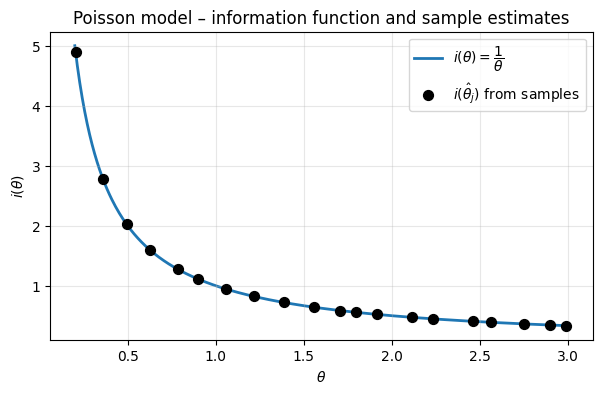

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta_values = np.linspace(0.2, 3, 20) # 20 theta’s
n         = 1500 # sample size for each theta
rng       = np.random.default_rng()

def fisher_like_info(theta):
    """i(theta) = 1/theta  (derived above).  Works for scalars or arrays."""
    return 1.0 / theta

# Simulate 20 independent samples and compute the MLE theta^ = X-
samples      = rng.poisson(lam=theta_values[:, None], size=(len(theta_values), n))
theta_hats       = samples.mean(axis=1)        # sample means (one per row)
i_hat_values = fisher_like_info(theta_hats)    # i(theta^) for plotting

theta_plot = np.linspace(theta_values.min(), theta_values.max(), 400)
plt.figure(figsize=(7, 4))
plt.plot(theta_plot, fisher_like_info(theta_plot), lw=2,
         label=r"$i(\theta)=\dfrac{1}{\theta}$", zorder=1)
plt.scatter(theta_hats, i_hat_values, color="black", s=50,
            label=r"$i(\hat{\theta}_j)$ from samples", zorder=2)
plt.title("Poisson model – information function and sample estimates")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$i(\theta)$")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [12]:
for j, (true_t, hat_t) in enumerate(zip(theta_values, theta_hats), 1):
    print(f"theta_{j:02d} true = {true_t:5.2f}   theta ^= {hat_t:6.4f}")

theta_01 true =  0.20   theta ^= 0.2040
theta_02 true =  0.35   theta ^= 0.3593
theta_03 true =  0.49   theta ^= 0.4940
theta_04 true =  0.64   theta ^= 0.6267
theta_05 true =  0.79   theta ^= 0.7853
theta_06 true =  0.94   theta ^= 0.9013
theta_07 true =  1.08   theta ^= 1.0560
theta_08 true =  1.23   theta ^= 1.2147
theta_09 true =  1.38   theta ^= 1.3880
theta_10 true =  1.53   theta ^= 1.5553
theta_11 true =  1.67   theta ^= 1.7073
theta_12 true =  1.82   theta ^= 1.7940
theta_13 true =  1.97   theta ^= 1.9140
theta_14 true =  2.12   theta ^= 2.1120
theta_15 true =  2.26   theta ^= 2.2327
theta_16 true =  2.41   theta ^= 2.4600
theta_17 true =  2.56   theta ^= 2.5627
theta_18 true =  2.71   theta ^= 2.7487
theta_19 true =  2.85   theta ^= 2.9000
theta_20 true =  3.00   theta ^= 2.9887


### Итоги  

* Функция информации $i(\theta)=1/\theta$ монотонно **убывает** при росте $\theta$.  
* Все 20 точек $i(\hat\theta)$ лежат вблизи аналитической кривой, что подтверждает состоятельность и несмещённость оценки $\hat\theta=\bar X$.  
* Так как информация Фишера **больше** при малых $\theta$, дисперсия $\hat\theta$ там меньше; поэтому рассеяние точек увеличивается по мере роста $\theta$.